In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 1 mili

In [21]:
modulation = 93 #Hz
loop_number = 1    
res = 1/1000002240

sam, sr , segment_length = Adj9(res,modulation,loop_number)

In [22]:
sam

5376384

In [23]:
sr

1000007423

In [24]:
segment_length

0.005376344086021506

In [25]:
interval = segment_length*1e3 #mili

# AWG and Pulse files setup

In [30]:
AWG_Settings_1mili= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':150,
    'Clock Sample Frecuency':1000007423,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\60,30\pos\1mili',
}

In [ ]:
M8190A = VisaR(AWG_Settings_1mili,60000)

In [ ]:
M8190A.write('FREQ:RAST 1000002240')

21

In [ ]:
Initialization(M8190A,AWG_Settings_1mili)

Instruments Sampling Frecuency set to 1.00000224000000E+09Hz
Instruments Direct Out DC Output route Voltage set to 6.75000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [7]:
Pump_1mili = {
    'Name':'Pump_1mili',
    'Amplitude':2*60,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [8]:
ProbeA_1mili = {
    'Name':'ProbeA_1mili',
    'Amplitude':2*30,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [9]:
ProbeB_1mili = {
    'Name':'ProbeB_1mili',
    'Amplitude':-2*30,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [10]:
PulseScheme_A_1mili =  {
    'Name' : 'PulseScheme_A_1mili',
    'Pulse Scheme': [Pump_1mili,ProbeA_1mili],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\pos\1mili'
}

In [11]:
PulseScheme_B_1mili =  {
    'Name' : 'PulseScheme_B_1mili',
    'Pulse Scheme': [Pump_1mili,ProbeB_1mili],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\pos\1mili'
}

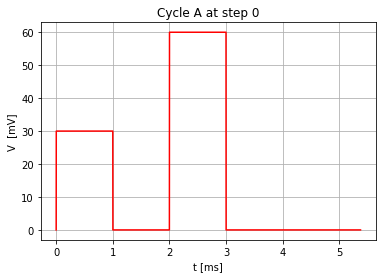

In [12]:
step = 0
pul1 = Sweep_teil(PulseScheme_A_1mili,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe recalculated 1mili {a} step.jpeg'.format(a = step,loc = PulseScheme_A_1mili['Measurement file Path']),bbox_inches='tight')

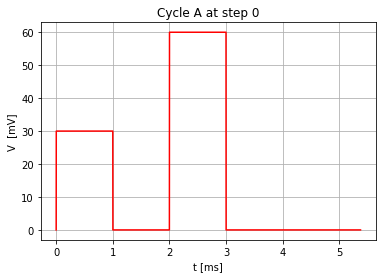

In [ ]:
step = 0
pul1 = Sweep_teil(PulseScheme_A_1mili,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe recalculated 1mili {a} step.jpeg'.format(a = step,loc = PulseScheme_A_1mili['Measurement file Path']),bbox_inches='tight')

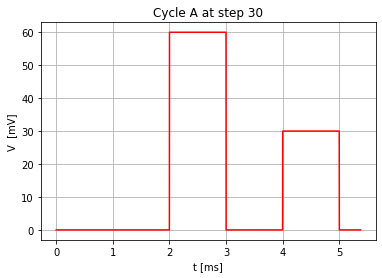

In [15]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_1mili,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe recalculated 1mili {a} step.jpeg'.format(a = step,loc = PulseScheme_A_1mili['Measurement file Path']),bbox_inches='tight')

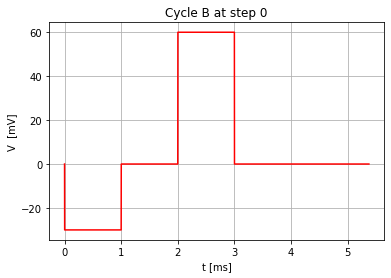

In [13]:
step = 0
pul1 = Sweep_teil(PulseScheme_B_1mili,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle B, Probe recalculated 1mili {a} step.jpeg'.format(a = step,loc = PulseScheme_A_1mili['Measurement file Path']),bbox_inches='tight')

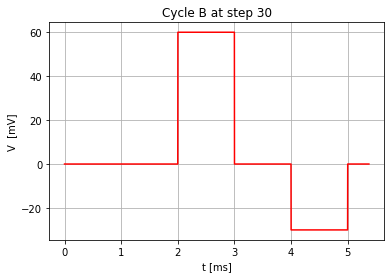

In [14]:
step = 30
pul1 = Sweep_teil(PulseScheme_B_1mili,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe recalculated 1mili {a} step.jpeg'.format(a = step,loc = PulseScheme_A_1mili['Measurement file Path']),bbox_inches='tight')

In [16]:
sweeping_run_a_1mili = Sweeping_Single_List_File_teil(PulseScheme_A_1mili,30,interval,sam,0,30,AWG_Settings_1mili,'A')[0]

In [17]:
sweeping_run_b_1mili = Sweeping_Single_List_File_teil(PulseScheme_B_1mili,30,interval,sam,0,30,AWG_Settings_1mili,'B')[0]

In [18]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_90Hz_1mili_1000002240GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1mili, k)


with open(r"{dict}\cycleB_31steps_90Hz_1mili_1000002240GHz.p".format(dict = PulseScheme_B_1mili['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1mili, h)

In [17]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_90Hz_1mili_1000002240GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "rb") as j:
    sweeping_run_a_1mili = pickle.load(j)

with open(r"{dict}\cycleB_31steps_90Hz_1mili_1000002240GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "rb") as f:
    sweeping_run_b_1mili = pickle.load(f)

In [15]:
1+1

2

In [18]:
sweeping_run_a_1mili['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\60,30\\pos\\1mili\\SegmentA_5376384_30.csv'

In [ ]:
sweeping_run_b_1mili['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
Sequence_File(M8190A,sweeping_runa_1mili['Pulse File Location, at step 0'],sweeping_runb_1mili['Pulse File Location, at step 0'],1)

Sequence loaded with the following segment data "1,1,0,1,0,11000063,2,1,0,1,0,11000063" and the advancement method is COND


2

# Loading

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '300ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '45Hz'
}

In [ ]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_runa_1mili,sweeping_runb_1mili,PulseScheme_A_1mili['Measurement file Path'],Lock_In_Settings,1)

Sequence loaded with the following segment data "1,1,0,1,0,11000063,2,1,0,1,0,11000063" and the advancement method is COND
Average Value for measurement at step 0 is 1.5992983535622711 V
Sequence loaded with the following segment data "1,1,0,1,0,11000063,2,1,0,1,0,11000063" and the advancement method is COND
Average Value for measurement at step 1 is 1.6024841946361357 V
Sequence loaded with the following segment data "1,1,0,1,0,11000063,2,1,0,1,0,11000063" and the advancement method is COND
Average Value for measurement at step 2 is 1.6319065600870188 V
Sequence loaded with the following segment data "1,1,0,1,0,11000063,2,1,0,1,0,11000063" and the advancement method is COND
Average Value for measurement at step 3 is 1.672388343622686 V
Sequence loaded with the following segment data "1,1,0,1,0,11000063,2,1,0,1,0,11000063" and the advancement method is COND
Average Value for measurement at step 4 is 1.6723632549269591 V
Sequence loaded with the following segment data "1,1,0,1,0,1100006

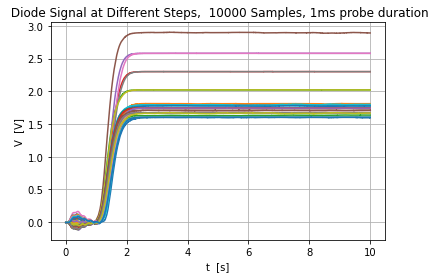

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1ms probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5 35ms scheme, probe duration 1 mili,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-4,4,31)

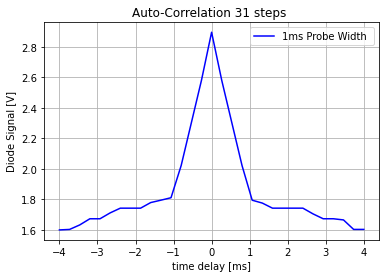

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1ms Probe Width ',color='blue')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ms]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 45Hz, 3 sep length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [44]:
modulation = 93 #Hz
loop_number = 10    
res = 1/3003004800

sam, sr , cycle_length = Adj9(res,modulation,loop_number)

In [45]:
sam

1614528

In [46]:
sr

3003022080

In [47]:
cycle_length*10

0.005376344086021506

In [39]:
modulation = 93 #Hz
loop_number = 3    
res = 1/3003004800

sam, sr , segment_length = Adj9(res,modulation,loop_number)

In [40]:
sam

5381760

In [41]:
sr

3003022080

In [43]:
cycle_length*3

0.005376344086021506

In [48]:
0.005376344086021506 == 0.005376344086021506

True

In [19]:
step30 = pd.read_csv(r'{loc}'.format(loc = sweeping_run_a_1mili['Pulse File Location, at step 30']))

In [27]:
step30['Y1']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
5376379    0.0
5376380    0.0
5376381    0.0
5376382    0.0
5376383    0.0
Name: Y1, Length: 5376384, dtype: float64

In [ ]:
sweeping_run_a_1mili['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\60,30\\pos\\1mili\\SegmentA_5376384_30.csv'

In [26]:
interval

5.376344086021506

In [28]:
timm = np.linspace(0,interval,sam)

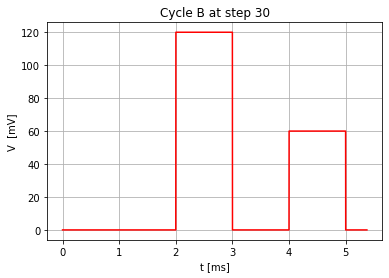

In [31]:



#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(timm,step30['Y1']*AWG_Settings_1mili['Voltage Amplitude'],label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle B, Probe recalculated 1mili {a} step.jpeg'.format(a = step,loc = PulseScheme_A_1mili['Measurement file Path']),bbox_inches='tight')